<a href="https://colab.research.google.com/github/ramdarsh/datascience_projects/blob/main/Stockprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df1=df.copy()

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(1009, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
train,test=train_test_split(df, test_size = 0.2)

In [ ]:
test_pred=test.copy()

In [ ]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
359,2019-07-11,381.100006,384.540009,378.799988,379.500000,379.500000,4336300
745,2021-01-21,582.450012,588.750000,570.400024,579.840027,579.840027,11802100
776,2021-03-08,514.460022,518.840027,492.850006,493.329987,493.329987,3981800
452,2019-11-20,301.010010,308.250000,301.000000,305.160004,305.160004,5111800
591,2020-06-11,428.200012,445.570007,424.160004,425.559998,425.559998,7462900
580,2020-05-27,410.380005,420.019989,397.859985,419.890015,419.890015,10446300
165,2018-10-01,375.850006,386.109985,375.589996,381.429993,381.429993,8376600
729,2020-12-28,516.429993,523.659973,507.130005,519.119995,519.119995,2891900
909,2021-09-15,578.169983,584.619995,575.369995,582.869995,582.869995,2755600
623,2020-07-28,496.019989,497.790009,487.760010,488.510010,488.510010,5986700


In [ ]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
947,2021-11-08,650.289978,656.000000,643.789978,651.450012,651.450012,2887500
439,2019-11-01,288.700012,289.119995,283.019989,286.809998,286.809998,5594300
980,2021-12-27,615.000000,615.000000,609.250000,613.119995,613.119995,2061500
865,2021-07-14,541.010010,554.099976,541.010010,547.950012,547.950012,4659500
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900
693,2020-11-04,495.359985,507.730011,493.980011,496.950012,496.950012,5137300
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
519,2020-02-28,364.209991,376.769989,356.799988,369.029999,369.029999,11168600
944,2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
50,2018-04-18,336.299988,338.820007,331.100006,334.519989,334.519989,11221100


In [ ]:
x_train = train[['Open','High','Low','Volume']].values
x_test = test[['Open','High','Low','Volume']].values

In [ ]:
y_train = train['Close'].values
y_test = test['Close'].values

ML algorithm used is LinearRegression

In [ ]:
msn = LinearRegression()
msn.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = msn.predict(x_test)

In [ ]:
y_pred

array([649.70533838, 284.49393096, 610.32812346, 551.46528535,
       507.37346207, 504.17499343, 414.70528446, 368.9196903 ,
       686.8434421 , 334.67046765, 338.68645945, 514.67974899,
       461.4770174 , 656.53063002, 353.52680706, 529.70088203,
       255.41574412, 481.3240375 , 507.03153589, 319.51980242,
       351.3518643 , 376.0355985 , 360.73029049, 555.98088968,
       513.79460917, 597.29794543, 309.31805235, 392.35237872,
       344.03118288, 395.38828746, 424.99874755, 586.06688887,
       389.36844512, 382.68767627, 512.39558252, 318.91179886,
       371.98206636, 285.49334187, 359.716728  , 528.41798109,
       530.49500562, 424.29180241, 402.27647362, 502.16349036,
       275.98169369, 396.06654594, 484.72908792, 280.1079654 ,
       449.43089763, 662.199964  , 291.54121294, 353.20259351,
       502.2179674 , 342.68836641, 255.11128954, 513.89835312,
       328.1021945 , 499.258462  , 547.96784598, 551.00383781,
       394.45605161, 609.6018492 , 346.4065331 , 521.11

In [ ]:
print("MSE :",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE :",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE :",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE :",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score :", round(r2_score(y_test,y_pred), 3))

MSE : 13.034
RMSE : 3.61
MAE : 2.824
MAPE : 0.007
R2 Score : 0.999


In [ ]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

    ax.set_facecolor("black") 

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'],format='%Y-%m-%d')

In [ ]:
data = pd.DataFrame(df1[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


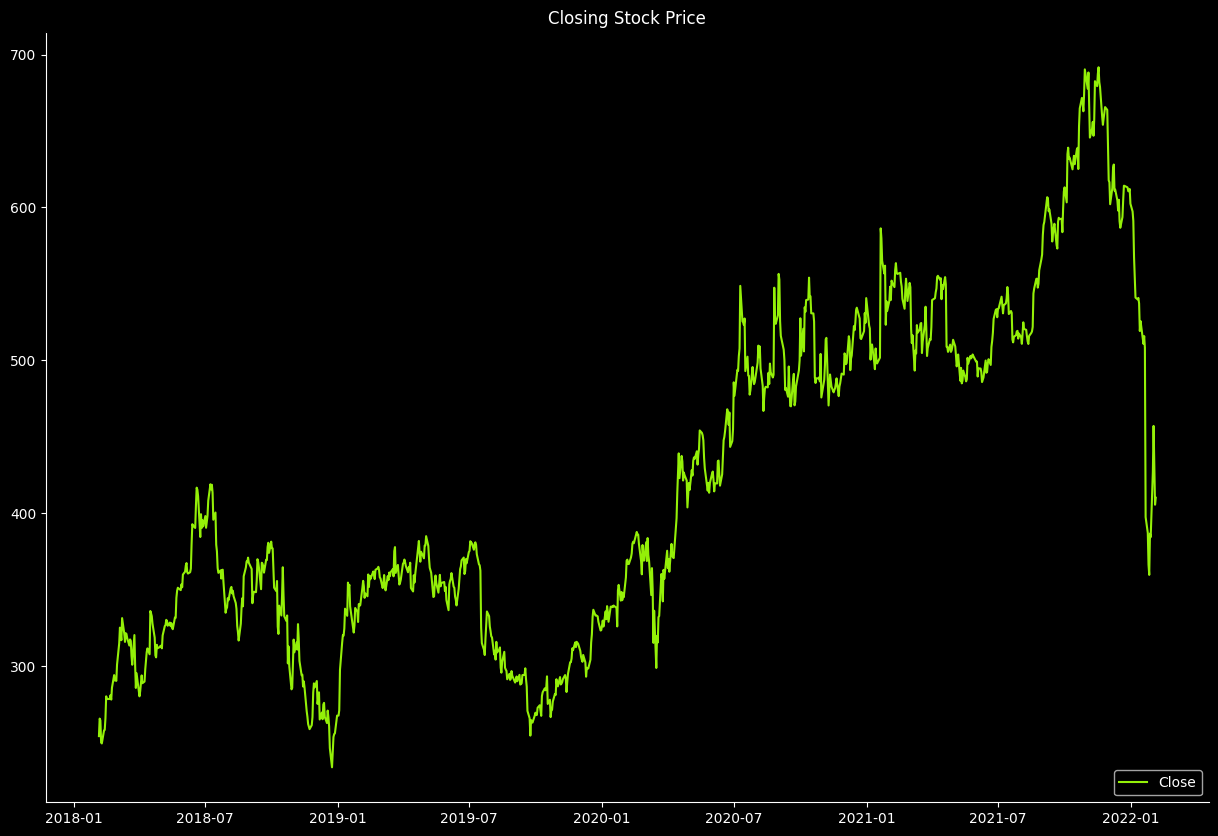

In [ ]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(df1.Date, df1.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

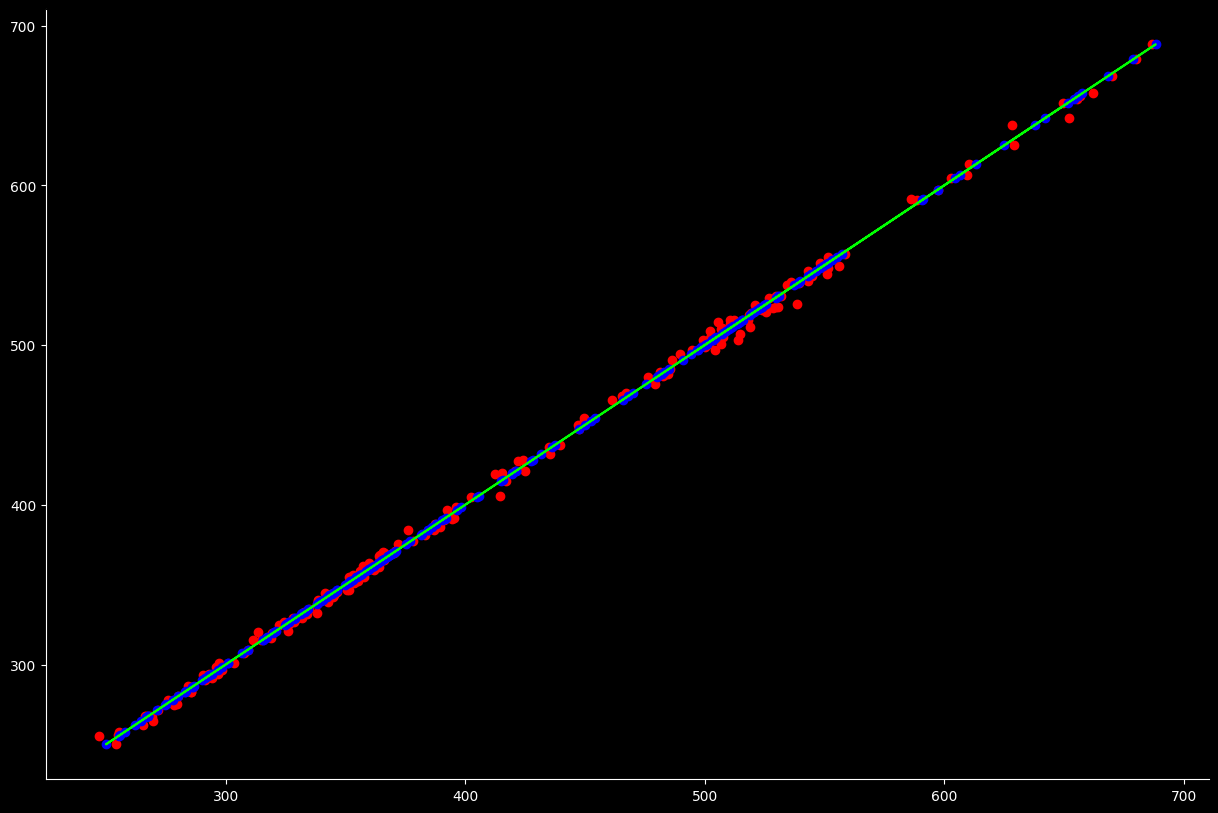

In [ ]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [ ]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
947,2021-11-08,650.289978,656.000000,643.789978,651.450012,651.450012,2887500,649.705338
439,2019-11-01,288.700012,289.119995,283.019989,286.809998,286.809998,5594300,284.493931
980,2021-12-27,615.000000,615.000000,609.250000,613.119995,613.119995,2061500,610.328123
865,2021-07-14,541.010010,554.099976,541.010010,547.950012,547.950012,4659500,551.465285
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,510.399994,2973900,507.373462
...,...,...,...,...,...,...,...,...
774,2021-03-04,521.500000,531.500000,507.679993,511.290009,511.290009,5034800,518.756475
394,2019-08-29,295.000000,299.929993,294.989990,296.779999,296.779999,4388500,298.713724
872,2021-07-23,512.159973,517.409973,504.660004,515.409973,515.409973,3820500,510.412577
647,2020-08-31,521.159973,531.989990,517.580017,529.559998,529.559998,4941400,527.032680


In [ ]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,421.405100,108.232474,250.100006,335.402489,390.914994,511.067505,688.289978
Close_Prediction,202.0,421.471994,108.357341,247.139313,338.029284,391.765437,510.413724,686.843442
